In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline
from game import game, random_connection_game

In [2]:
import time
from IPython.display import clear_output

In [3]:
Memb = 400
newg = random_connection_game(9,  Memb)

In [4]:
newg.print_original()

-0.08 0.00 0.00 0.04 0.07 0.18 -0.06 0.15 0.06 
0.00 -0.12 0.00 0.02 0.00 0.00 0.10 0.00 0.04 
0.00 0.00 -0.04 -0.15 0.06 0.00 -0.14 0.17 0.03 
0.04 0.02 -0.15 -0.13 0.00 0.06 0.10 -0.16 0.07 
0.07 0.00 0.06 0.00 0.00 -0.06 -0.08 -0.02 -0.03 
0.18 0.00 0.00 0.06 -0.06 0.00 0.00 0.08 0.03 
-0.06 0.10 -0.14 0.10 -0.08 0.00 -0.14 0.07 0.00 
0.15 0.00 0.17 -0.16 -0.02 0.08 0.07 0.07 0.05 
0.06 0.04 0.03 0.07 -0.03 0.03 0.00 0.05 -0.07 


In [5]:
newg.print_original()

-0.08 0.00 0.00 0.04 0.07 0.18 -0.06 0.15 0.06 
0.00 -0.12 0.00 0.02 0.00 0.00 0.10 0.00 0.04 
0.00 0.00 -0.04 -0.15 0.06 0.00 -0.14 0.17 0.03 
0.04 0.02 -0.15 -0.13 0.00 0.06 0.10 -0.16 0.07 
0.07 0.00 0.06 0.00 0.00 -0.06 -0.08 -0.02 -0.03 
0.18 0.00 0.00 0.06 -0.06 0.00 0.00 0.08 0.03 
-0.06 0.10 -0.14 0.10 -0.08 0.00 -0.14 0.07 0.00 
0.15 0.00 0.17 -0.16 -0.02 0.08 0.07 0.07 0.05 
0.06 0.04 0.03 0.07 -0.03 0.03 0.00 0.05 -0.07 


In [6]:
newg.state.shape

(2, 400, 400)

In [7]:
def randomAgent(state, Memb = 25):
    #move = random.randint(3)
    spin_1 = random.randint(Memb)
    spin_2 = random.randint(4)
    return (spin_1, spin_2)

In [8]:
from model.dqn_agent import Agent

In [9]:
from model.model import QNetwork_Conv

In [10]:
# Reset!
Memb = 6*6
statesize = Memb*Memb*1+9*9
actionsize = Memb*4
randomAgent0 = lambda state: randomAgent(state, Memb)
#env = game(Hint, Memb = Memb)
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [64, 64, 256, 128, 128, 128], model = QNetwork_Conv)

#                   nu = [32, 64, 64, 64, 64], model = QNetwork_Conv)


In [11]:
env = random_connection_game(5,  Memb)


In [12]:
state = env.reset()
smartagent0.act(state, eps = 1.0)

/home/pablo/github/mios/game_embeddings/model/model.py:121: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.Softmax(x)


(10, 3)

5 3 1
1 (23, 1) 3


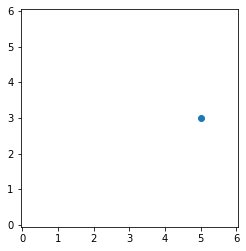

In [13]:
action = smartagent0.act(state, eps = 1.0)
state, reward, done =env.step(action)
env.plot()
print(action[0]%6, action[0]//6, action[1])
print(env.N, action, env.terms_left)


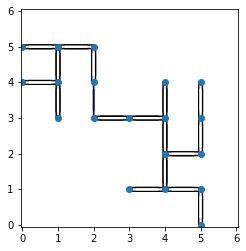

0.6527777777777779 19 (31, 2) 0


In [14]:
env = random_connection_game(4,  Memb, 
                             max_consecutive_failures = 50)
env.reset()
#
state = env.state
fig, ax = env.plot()
score = 0.0
actions = []
for j in range(100):
    clear_output(wait=True)
    #randomAgent(state, Memb)#
    action = smartagent0.act(state, eps = 0.0)
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

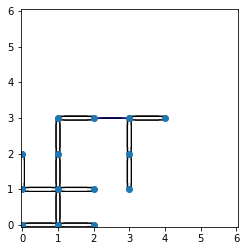

0.75 14 (14, 0) 0


In [58]:

Memb = 6*6
statesize = Memb*Memb*1+9*9
actionsize = Memb*4
env = random_connection_game(2,  Memb, 
                             max_consecutive_failures = 50)
state = env.reset()
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [16, 16, 16, 16, 32], model = QNetwork_Conv)

fig, ax = env.plot()
score = 0.0

action = (3+3*6,0)
next_state, reward, done = env.step(action)
action_tr = action[0]+action[1]*Memb
smartagent0.step(state, action_tr, reward, next_state, done)
state = next_state
score += reward
actions.append((*action, reward))

actions = []
for j in range(100):
    clear_output(wait=True)
    #randomAgent(state, Memb)#
    action = smartagent0.act(state, eps = 0.0)
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

In [59]:
actions

[(0, 0, -0.005555555555555556),
 (13, 0, -0.019444444444444445),
 (20, 1, -0.019444444444444445),
 (27, 2, -0.019444444444444445),
 (3, 0, -0.019444444444444445),
 (8, 2, -0.019444444444444445),
 (7, 3, -0.019444444444444445),
 (28, 2, -0.019444444444444445),
 (12, 0, -0.019444444444444445),
 (18, 3, -0.019444444444444445),
 (29, 3, -0.019444444444444445),
 (9, 1, -0.019444444444444445),
 (2, 0, -0.005555555555555556),
 (0, 3, -0.019444444444444445),
 (14, 0, 1.0)]

In [62]:
from collections import namedtuple, deque

def dqn(agent, n_episodes=2000, max_t=2000, 
        eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        
        action = (3+3*6,0)
        next_state, reward, done = env.step(action)
        action_tr = action[0]+action[1]*Memb
        agent.step(state, action_tr, reward, next_state, done)
        state = next_state
        score += reward

        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            action_tr = action[0]+action[1]*Memb
            agent.step(state, action_tr, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score, eps: {:.2f}, {:.2f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=0.9999:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_online.state_dict(), 'checkpoint.pth')
            break
    return scores

In [63]:
scores = dqn(smartagent0, n_episodes=1000, eps_decay = 0.995)

Episode 100	Average Score, eps: 0.86, 0.61
Episode 200	Average Score, eps: 0.82, 0.37
Episode 300	Average Score, eps: 0.80, 0.22
Episode 400	Average Score, eps: 0.82, 0.13
Episode 500	Average Score, eps: 0.86, 0.08
Episode 600	Average Score, eps: 0.87, 0.05
Episode 700	Average Score, eps: 0.88, 0.03
Episode 800	Average Score, eps: 0.89, 0.02
Episode 900	Average Score, eps: 0.83, 0.01
Episode 1000	Average Score, eps: 0.89, 0.01


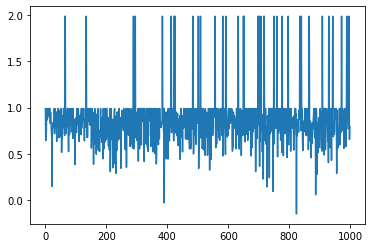

In [64]:
plt.plot(scores)

In [ ]:
scores2 = dqn(smartagent0, n_episodes=10000, eps_start= 0.15, eps_decay = 0.9995)

In [ ]:
scores2 = dqn(smartagent0, n_episodes=2000, eps_start= 0.15)

In [ ]:
scores3 = dqn(smartagent0, n_episodes=2000, eps_start= 0.3)

In [ ]:
idx = np.arange(len(scores2))+len(scores)
plt.plot(scores)
plt.plot(idx,scores2)

In [ ]:
torch.save(smartagent0.qnetwork_online.state_dict(), 'checkpoint.pth')

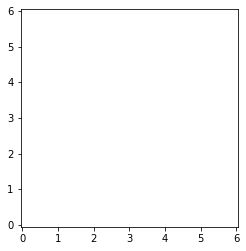

In [92]:
#env = random_connection_game(4,  Memb, 
#                             max_consecutive_failures = 50)

state = env.reset()
fig, ax = env.plot()
score = 0.0
action = (3+3*6,0)

next_state, reward, done = env.step(action)
action_tr = action[0]+action[1]*Memb
smartagent0.step(state, action_tr, reward, next_state, done)
state = next_state
score += reward

actions = []
for j in range(2000):
    
    clear_output(wait=True)

    action = smartagent0.act(state, eps = 0.0)
    #action = actions[j][:3]
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

In [95]:
def get_probs(state):
    state = torch.from_numpy(state).float().unsqueeze(0).to(device)
    smartagent0.qnetwork_online.eval()
    with torch.no_grad():
        action_values = smartagent0.qnetwork_online(state)
    smartagent0.qnetwork_online.train()

    return np.squeeze(action_values.cpu().data.numpy())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


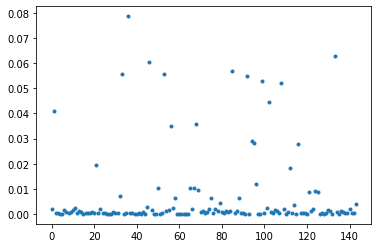

In [97]:
plt.plot(get_probs(state),'.')

In [100]:
Memb*4

144

In [29]:
def step_ext(self, move):
    self.reward = 0.0

    if self.N0<self.nS:
        self.add_new_spin(move[0])
    else:    
        spinpos_1 = self.posS[move[0]%self.N] 
        j = self.get_neighbours(spinpos_1, move[1])
        js = np.array([self.get_neighbours(spinpos_1, (move[1]+k)%4) 
                      for k in range(4)])

        sel = (js > -1)
        if sel.sum()>0:
            js = js[sel]
            idcs = np.arange(js.shape[0])
            i = spinpos_1
            print(i, js,':', i%self.Lx, i//self.Lx)
            for idx in idcs:
                j = js[idx]
                i0 = self.uniqS[i] 
                j0 = self.uniqS[j]
                print(i0, j0, j)
                if i0 != j0 and j0 == -1:
                    self.copy_spin(i,j)
                    print('Copied?')
                    break
                else:
                    jint0 = self.Hmask[i0,j0]
                    if jint0>0.0:
                        self.add_interaction(i,j)

                        print('Added?')
                        break
                    else:
                        pass

        else:
            self.number_nomoves += 1

            self.update_score(-1)

    self.state = self.get_state()

    if (self.Hmask>0).sum()==0:
        self.reward += self.nS
        self.score += self.reward
        self.finished = 1 # Won
    elif self.N == self.Memb:
        self.reward -= self.nS
        self.score += self.reward
        self.finished = 1 # Lost
    if self.number_nomoves > self.max_confailures:
        self.reward -= self.nS
        self.score += self.reward
        self.finished = 1

    return self.state, self.reward, self.finished
env.step = step_ext

1 1 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
3 0 3
1 (3, 3) 3


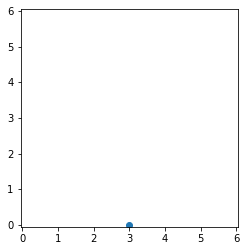

In [40]:
print(env.N, env.N0, env.posS)
action = (3,3)
state, reward, done =env.step(env,action)
env.plot()
print(action[0]%6, action[0]//6, action[1])
print(env.N, action, env.terms_left)


In [29]:
env.uniqS[2+6+6]

3

In [31]:
env.Hmask[:env.nS,:env.nS]

array([[0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 1.],
       [0., 1., 1., 0.]])

In [ ]:
np.random.choice?

In [ ]:
plt.plot(np.array(actions)[:,0],'.')

In [23]:
for param0,param1 in zip(smartagent0.qnetwork_online.parameters(),smartagent0.qnetwork_target.parameters()):
    print(param0.data.cpu().numpy()-param1.data.cpu().numpy())

[[[[ 5.15431166e-04]
   [-1.51129067e-03]
   [ 3.23827565e-03]
   [-3.43459845e-03]
   [ 1.03056431e-04]]

  [[-2.98134983e-03]
   [ 5.93878329e-04]
   [-2.59785354e-03]
   [-3.25068645e-03]
   [ 0.00000000e+00]]]


 [[[ 1.37270242e-03]
   [ 1.05532836e-02]
   [-8.64267349e-07]
   [-7.91326165e-03]
   [ 3.85440327e-03]]

  [[ 5.39750978e-03]
   [ 1.49501860e-02]
   [ 2.76767127e-02]
   [-1.83558464e-03]
   [ 5.95982075e-02]]]


 [[[-2.04023719e-03]
   [ 1.13965720e-02]
   [-1.36762857e-03]
   [ 2.61681527e-03]
   [-5.09971380e-03]]

  [[-1.29418820e-02]
   [ 5.71699440e-03]
   [-2.22345814e-02]
   [ 0.00000000e+00]
   [-2.12760717e-02]]]


 [[[-2.97017395e-04]
   [-2.70548463e-03]
   [-2.17178464e-03]
   [ 3.39701772e-03]
   [ 8.22371244e-03]]

  [[-2.94240266e-02]
   [ 7.20417500e-03]
   [-2.61764899e-02]
   [-2.52903402e-02]
   [ 0.00000000e+00]]]


 [[[-2.26119161e-03]
   [ 6.78441674e-03]
   [-3.72350216e-03]
   [-1.65772869e-03]
   [ 3.27606499e-03]]

  [[ 5.50557673e-03]
   [ 0.0